In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("census-income (1).csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [8]:
df.duplicated().sum()

24

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

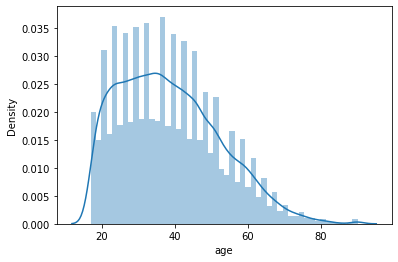

In [11]:
# Visualization
sns.distplot(df['age'])

Inference:
* on a average a persons age is 38
* min age is 17 & max age is 90
* it's a right skewed distribution : tail in right side

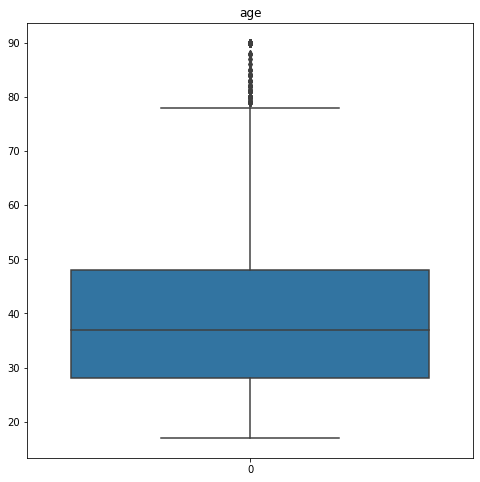

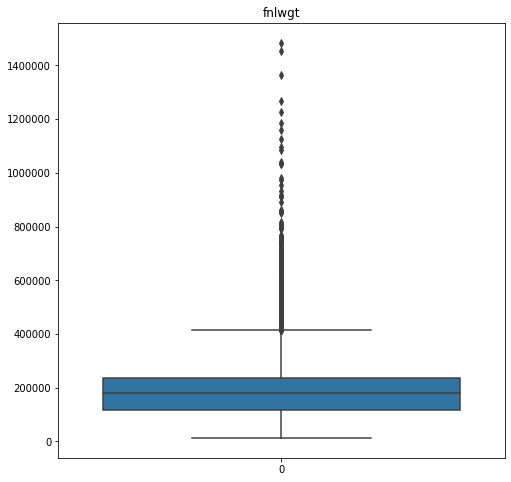

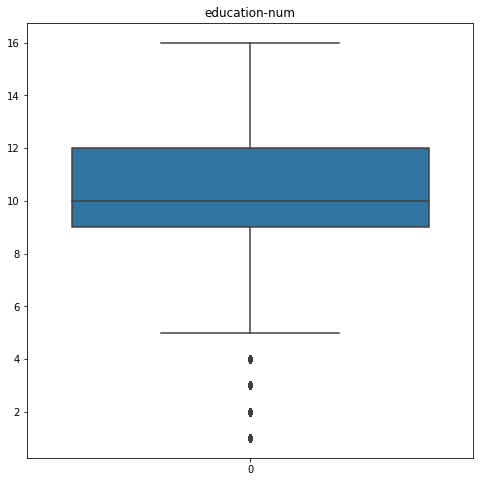

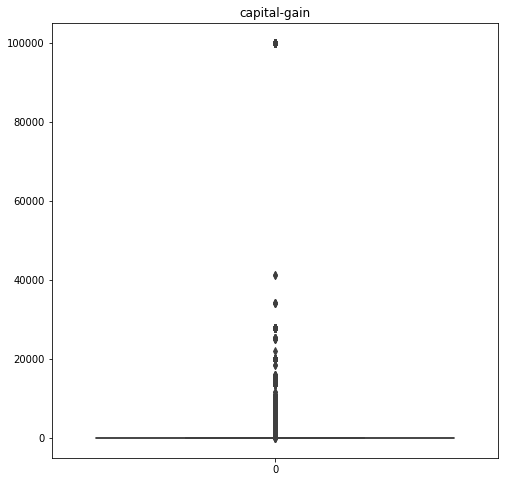

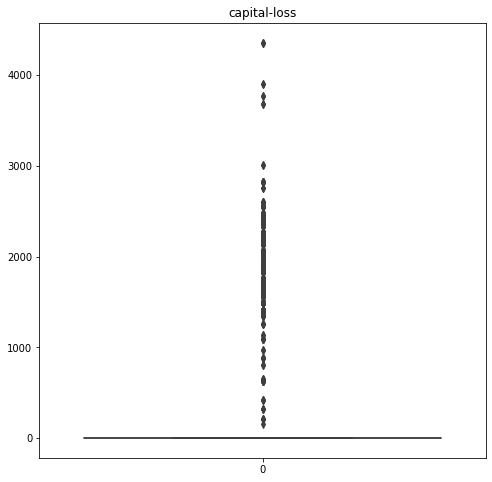

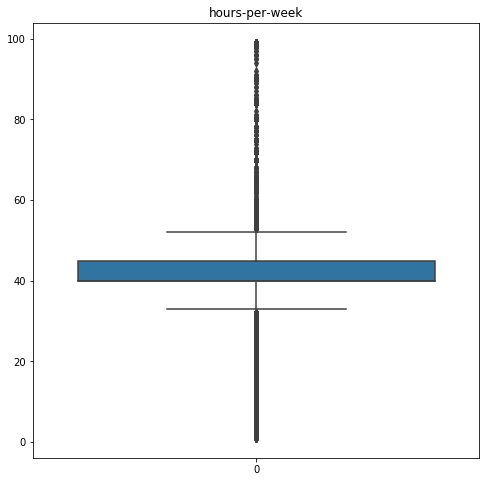

In [17]:
for col in df.columns:
    if (df[col].dtype != "object"):
        plt.figure(figsize=(8,8))
        sns.boxplot(df[col])
        plt.title(f"{col}")
        plt.show()

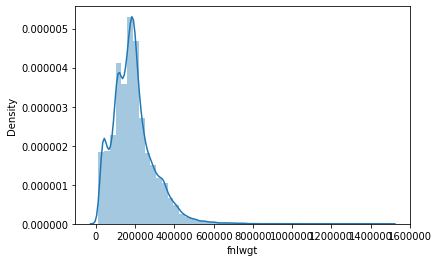

In [18]:
sns.distplot(df['fnlwgt'])

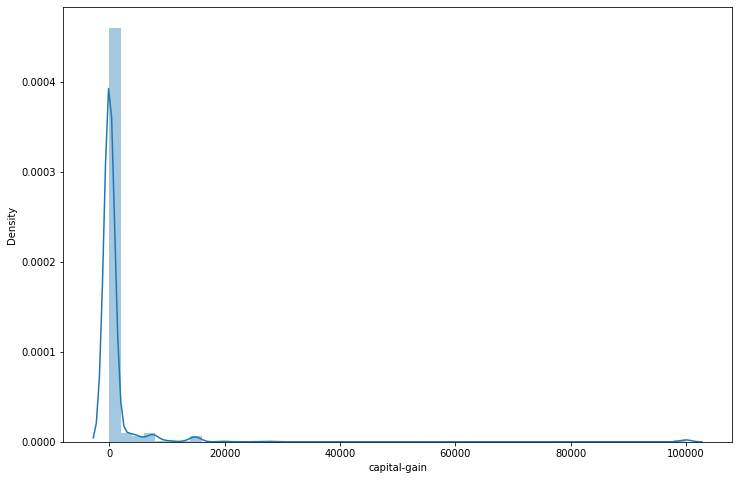

In [26]:
plt.figure(figsize=(12,8))
sns.distplot(df['capital-gain'])
plt.show()

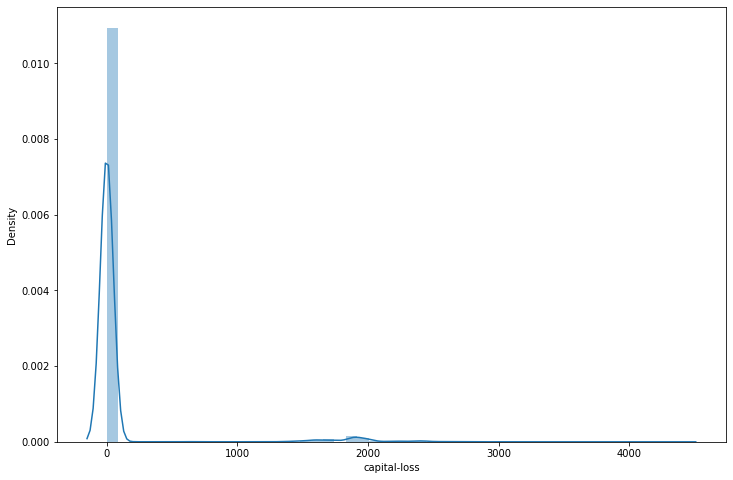

In [27]:

plt.figure(figsize=(12,8))
sns.distplot(df['capital-loss'])
plt.show()

In [28]:
df['capital-gain'].value_counts()

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64

In [29]:
df['capital-loss'].value_counts()

0       31018
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital-loss, Length: 92, dtype: int64

for capital capital-gain and capital-loss, no of 0's is same as other unique values. So here if we remove outliers either 0 or all other unique values will be removed which we don't want.

In [30]:
outlier_cols = ['age', 'fnlwgt', 'education-num', 'hours-per-week']
for col in outlier_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - 1.5*iqr
    uf = q3 + 1.5*iqr
    df = df[(df[col] >= lf) & (df[col] <= uf)]

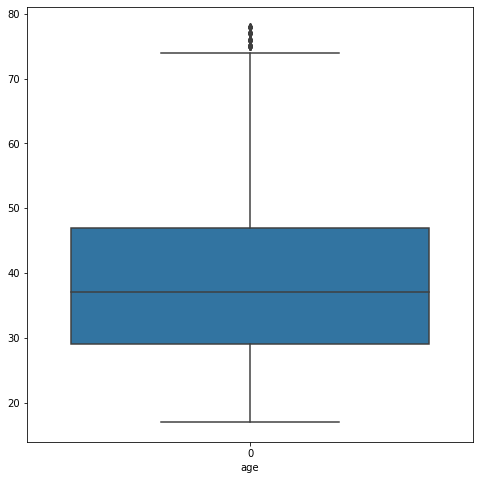

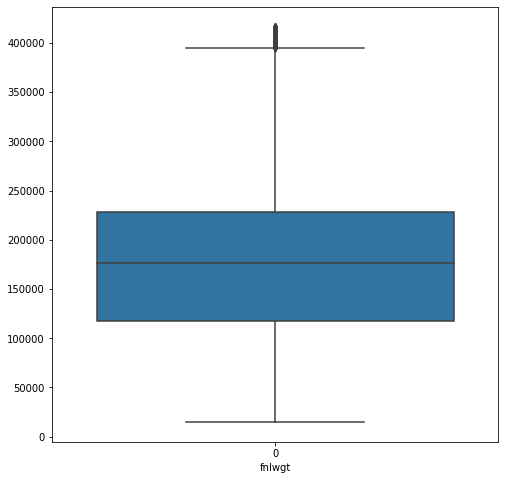

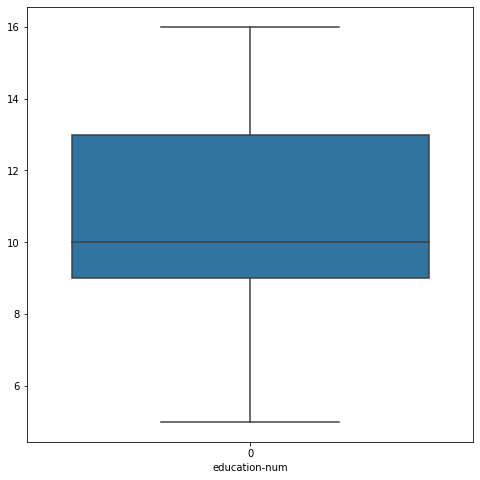

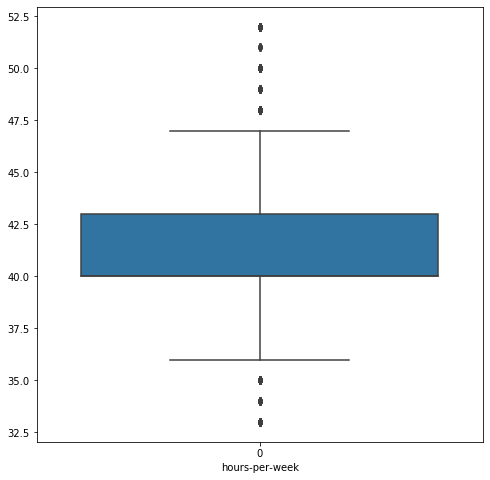

In [31]:
for col in outlier_cols:
    plt.figure(figsize=(8,8))
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [36]:
# Encoding of Categorical Columns
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual_income     object
dtype: object

In [39]:
le = LabelEncoder()

In [40]:
for col in df.columns:
    if (df[col].dtype == 'object'):
        df[col] = le.fit_transform(df[col])

In [41]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,7,77516,6,13,4,1,1,4,1,2174,0,40,39,0
2,38,4,215646,8,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,6,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,9,14,2,4,5,4,0,0,0,40,39,0


In [42]:
# Feature Selection
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
age,1.000000,0.020250,-0.064995,-0.006792,0.072917,-0.282238,0.001784,-0.219569,0.027177,0.072182,0.087463,0.059755,0.053371,0.005299,0.266012
workclass,0.020250,1.000000,-0.019468,0.007506,0.041089,-0.045123,0.183220,-0.079512,0.055109,0.079389,0.030703,0.002044,0.083858,-0.002661,0.029072
fnlwgt,-0.064995,-0.019468,1.000000,-0.012303,-0.022056,0.029911,0.002195,0.002740,-0.007833,0.019476,-0.001302,-0.001663,-0.009936,-0.040914,0.001896
education,-0.006792,0.007506,-0.012303,1.000000,0.167065,-0.019512,-0.033613,0.009613,0.014743,-0.027983,0.016373,0.010719,0.018782,0.033800,0.032488
education-num,0.072917,0.041089,-0.022056,0.167065,1.000000,-0.028222,0.144455,-0.091891,0.030905,0.005512,0.110145,0.081836,0.146949,-0.036067,0.329019
marital-status,-0.282238,-0.045123,0.029911,-0.019512,-0.028222,1.000000,0.000172,0.147807,-0.077662,-0.084300,-0.034681,-0.026146,-0.087103,-0.027434,-0.172816
occupation,0.001784,0.183220,0.002195,-0.033613,0.144455,0.000172,1.000000,-0.092800,0.009862,0.096853,0.019957,0.017679,0.080720,-0.012672,0.081794
relationship,-0.219569,-0.079512,0.002740,0.009613,-0.091891,0.147807,-0.092800,1.000000,-0.129355,-0.590028,-0.046983,-0.061979,-0.184097,-0.009220,-0.243848
race,0.027177,0.055109,-0.007833,0.014743,0.030905,-0.077662,0.009862,-0.129355,1.000000,0.102487,0.010988,0.022598,0.095195,0.158031,0.076540
sex,0.072182,0.079389,0.019476,-0.027983,0.005512,-0.084300,0.096853,-0.590028,0.102487,1.000000,0.039195,0.049239,0.184546,-0.003647,0.215651


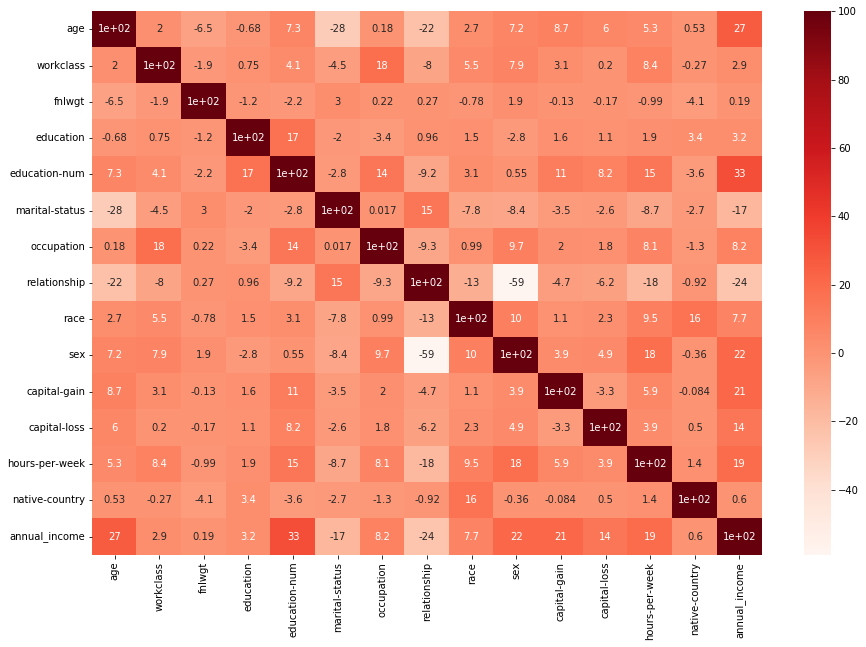

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()*100, annot=True, cmap='Reds')
plt.show()

**Model Building**
* Logistic Regression
* Decision Tree
* Random Forest

In [49]:
# Splitting Data
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [50]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,6,13,4,1,1,4,1,2174,0,40,39
2,38,4,215646,8,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,6,13,2,10,5,2,0,0,0,40,5
5,37,4,284582,9,14,2,4,5,4,0,0,0,40,39


In [51]:
y

0        0
2        0
3        0
4        0
5        0
        ..
32555    0
32556    0
32557    1
32558    0
32560    1
Name: annual_income, Length: 21945, dtype: int32

In [52]:
# Train-Test Split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3, random_state=21)

In [53]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(15361, 14)
(6584, 14)
(15361,)
(6584,)


In [56]:
# Logistic Regression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy_score(ypred,ytest)

0.7814398541919806

In [58]:
print(confusion_matrix(ypred,ytest))

[[4673 1280]
 [ 159  472]]


In [59]:
accuracy = (4673+472)/(4673+472+1280+159)
print(accuracy)

0.7814398541919806


In [65]:
# Decision Tree
dt = DecisionTreeClassifier()
model = dt.fit(xtrain,ytrain)
ypred = model.predict(xtest)
accuracy_score(ypred,ytest)

0.7907047387606319

In [72]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
accuracy_score(ypred,ytest)

0.8428007290400972